In [35]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [36]:
df = pd.read_csv("cardekho_data.csv")

In [37]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Exploratory Data Analysis (EDA)

In [38]:
# Display first few rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
df.shape

(301, 9)

In [40]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [41]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [42]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [43]:
df.dropna(inplace=True) ## drop null values

In [44]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [45]:
# Initialize the LabelEncoder
le = LabelEncoder()

In [48]:
Car_Name = LabelEncoder() ### every column ko distribute in numers
Fuel_Type  = LabelEncoder()
Seller_Type   = LabelEncoder()
Transmission   = LabelEncoder()


In [49]:
# Fit the LabelEncoder and transform the data for each column
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])


print("\nEncoded Data:")
print(df)


Encoded Data:
     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0          90  2014           3.35           5.59       27000          2   
1          93  2013           4.75           9.54       43000          1   
2          68  2017           7.25           9.85        6900          2   
3          96  2011           2.85           4.15        5200          2   
4          92  2014           4.60           6.87       42450          1   
..        ...   ...            ...            ...         ...        ...   
296        69  2016           9.50          11.60       33988          1   
297        66  2015           4.00           5.90       60000          2   
298        69  2009           3.35          11.00       87934          2   
299        69  2017          11.50          12.50        9000          1   
300        66  2016           5.30           5.90        5464          2   

     Seller_Type  Transmission  Owner  
0              0             1  

In [50]:
df.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,0.017265,0.499198,0.475539,0.064453,-0.371446,-0.829718,-0.059855,-0.081192
Year,0.017265,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.499198,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.475539,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,0.064453,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.371446,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.829718,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,-0.059855,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.081192,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


array([[<Axes: title={'center': 'Car_Name'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>,
        <Axes: title={'center': 'Fuel_Type'}>],
       [<Axes: title={'center': 'Seller_Type'}>,
        <Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Owner'}>]], dtype=object)

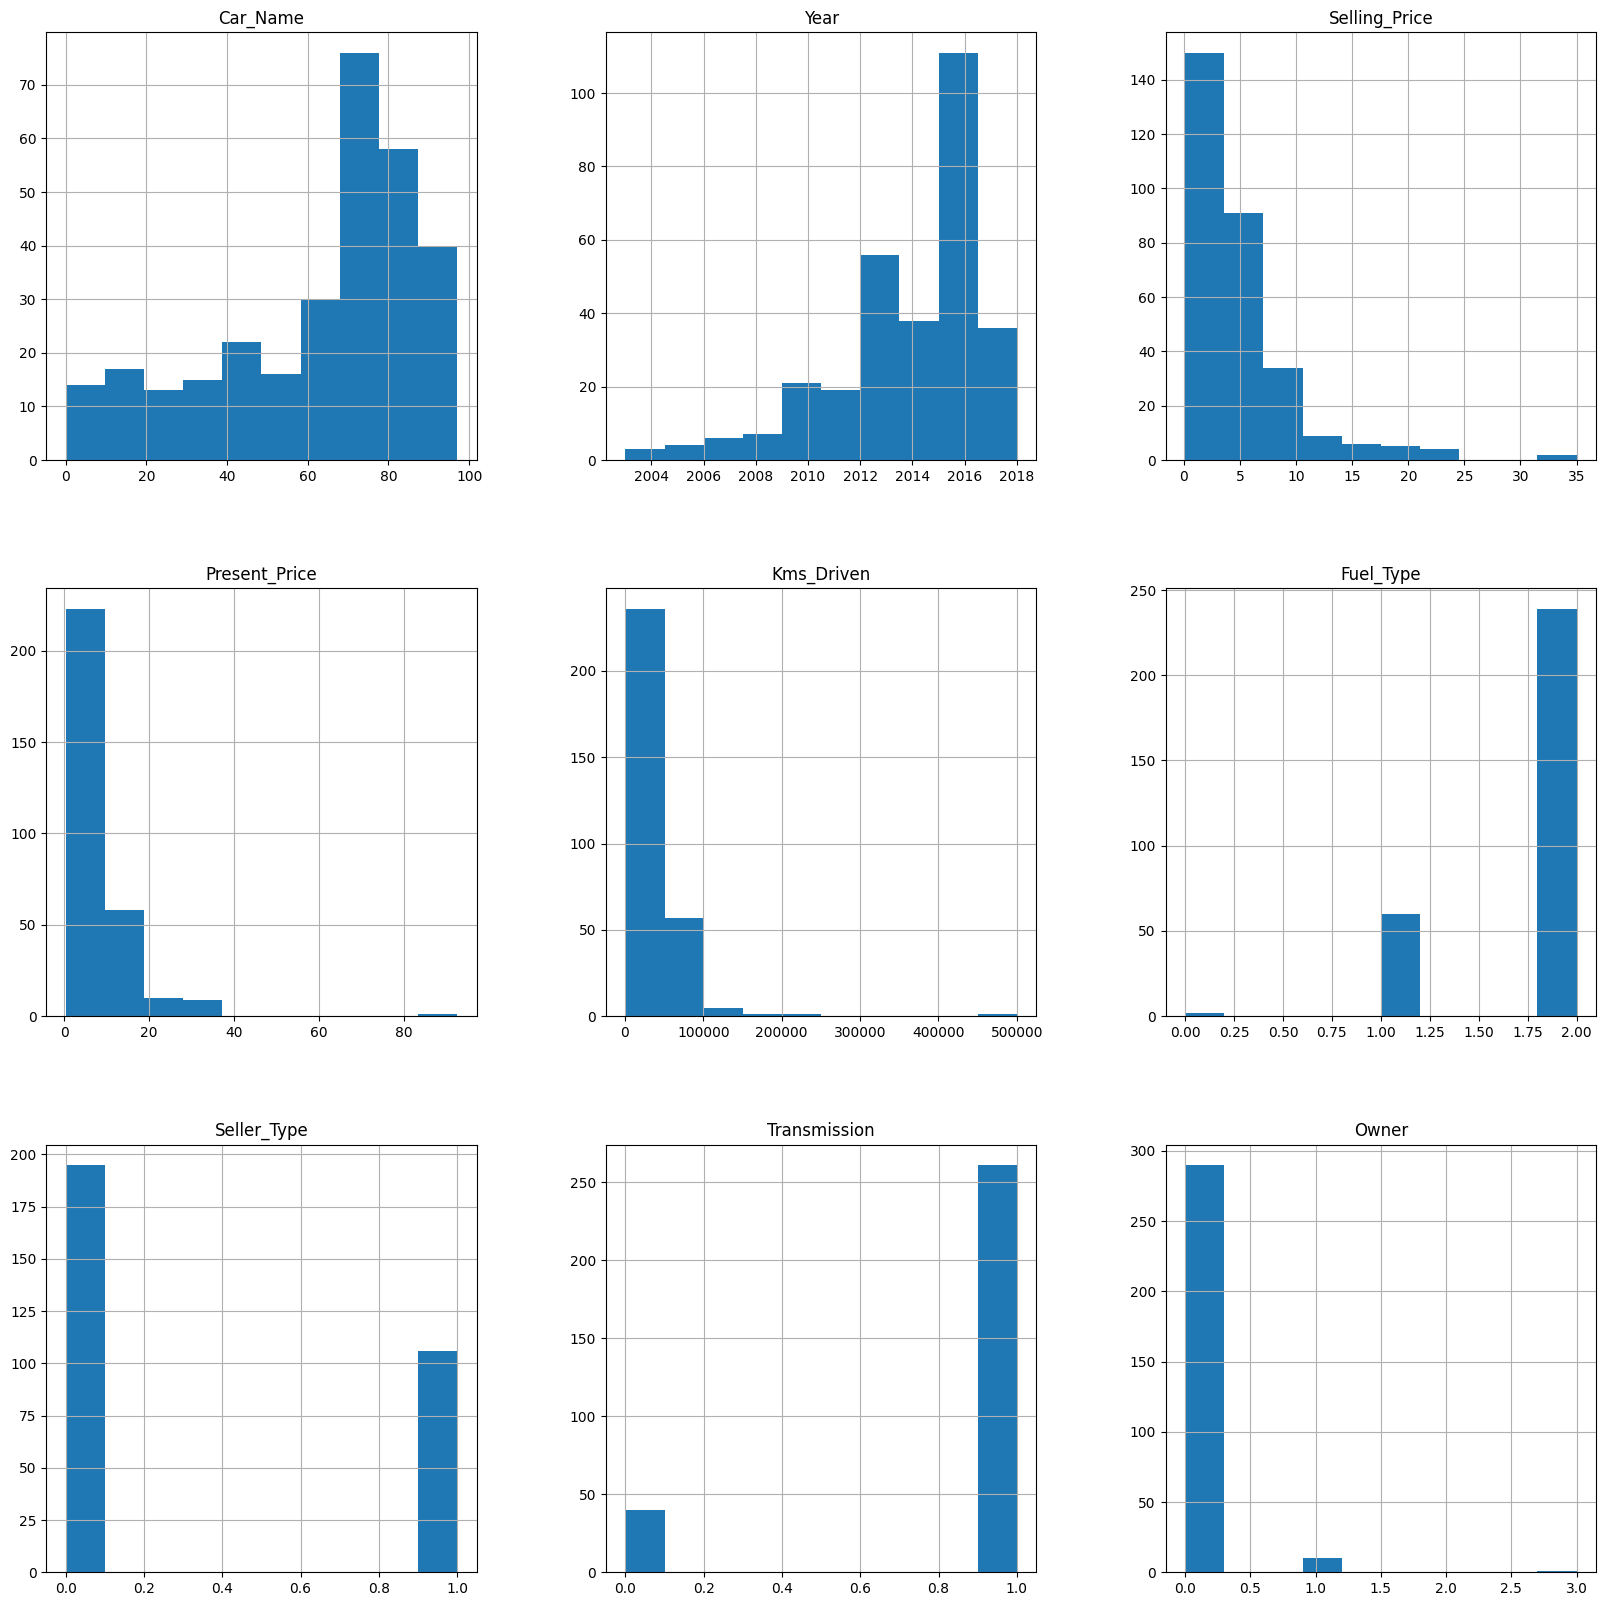

In [53]:

df.hist(figsize = (20,20))

<Axes: >

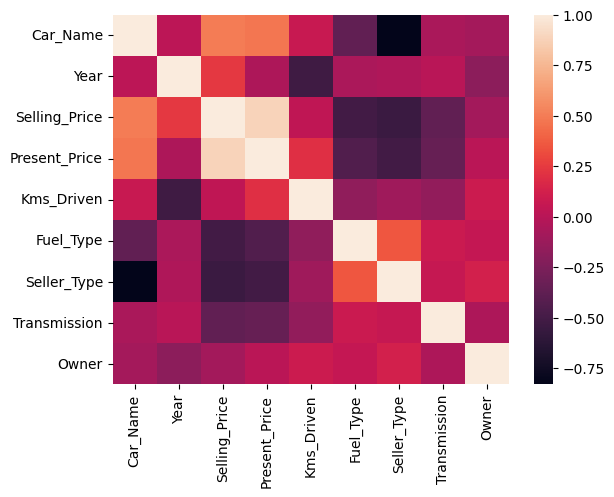

In [52]:

sns.heatmap(df.corr())

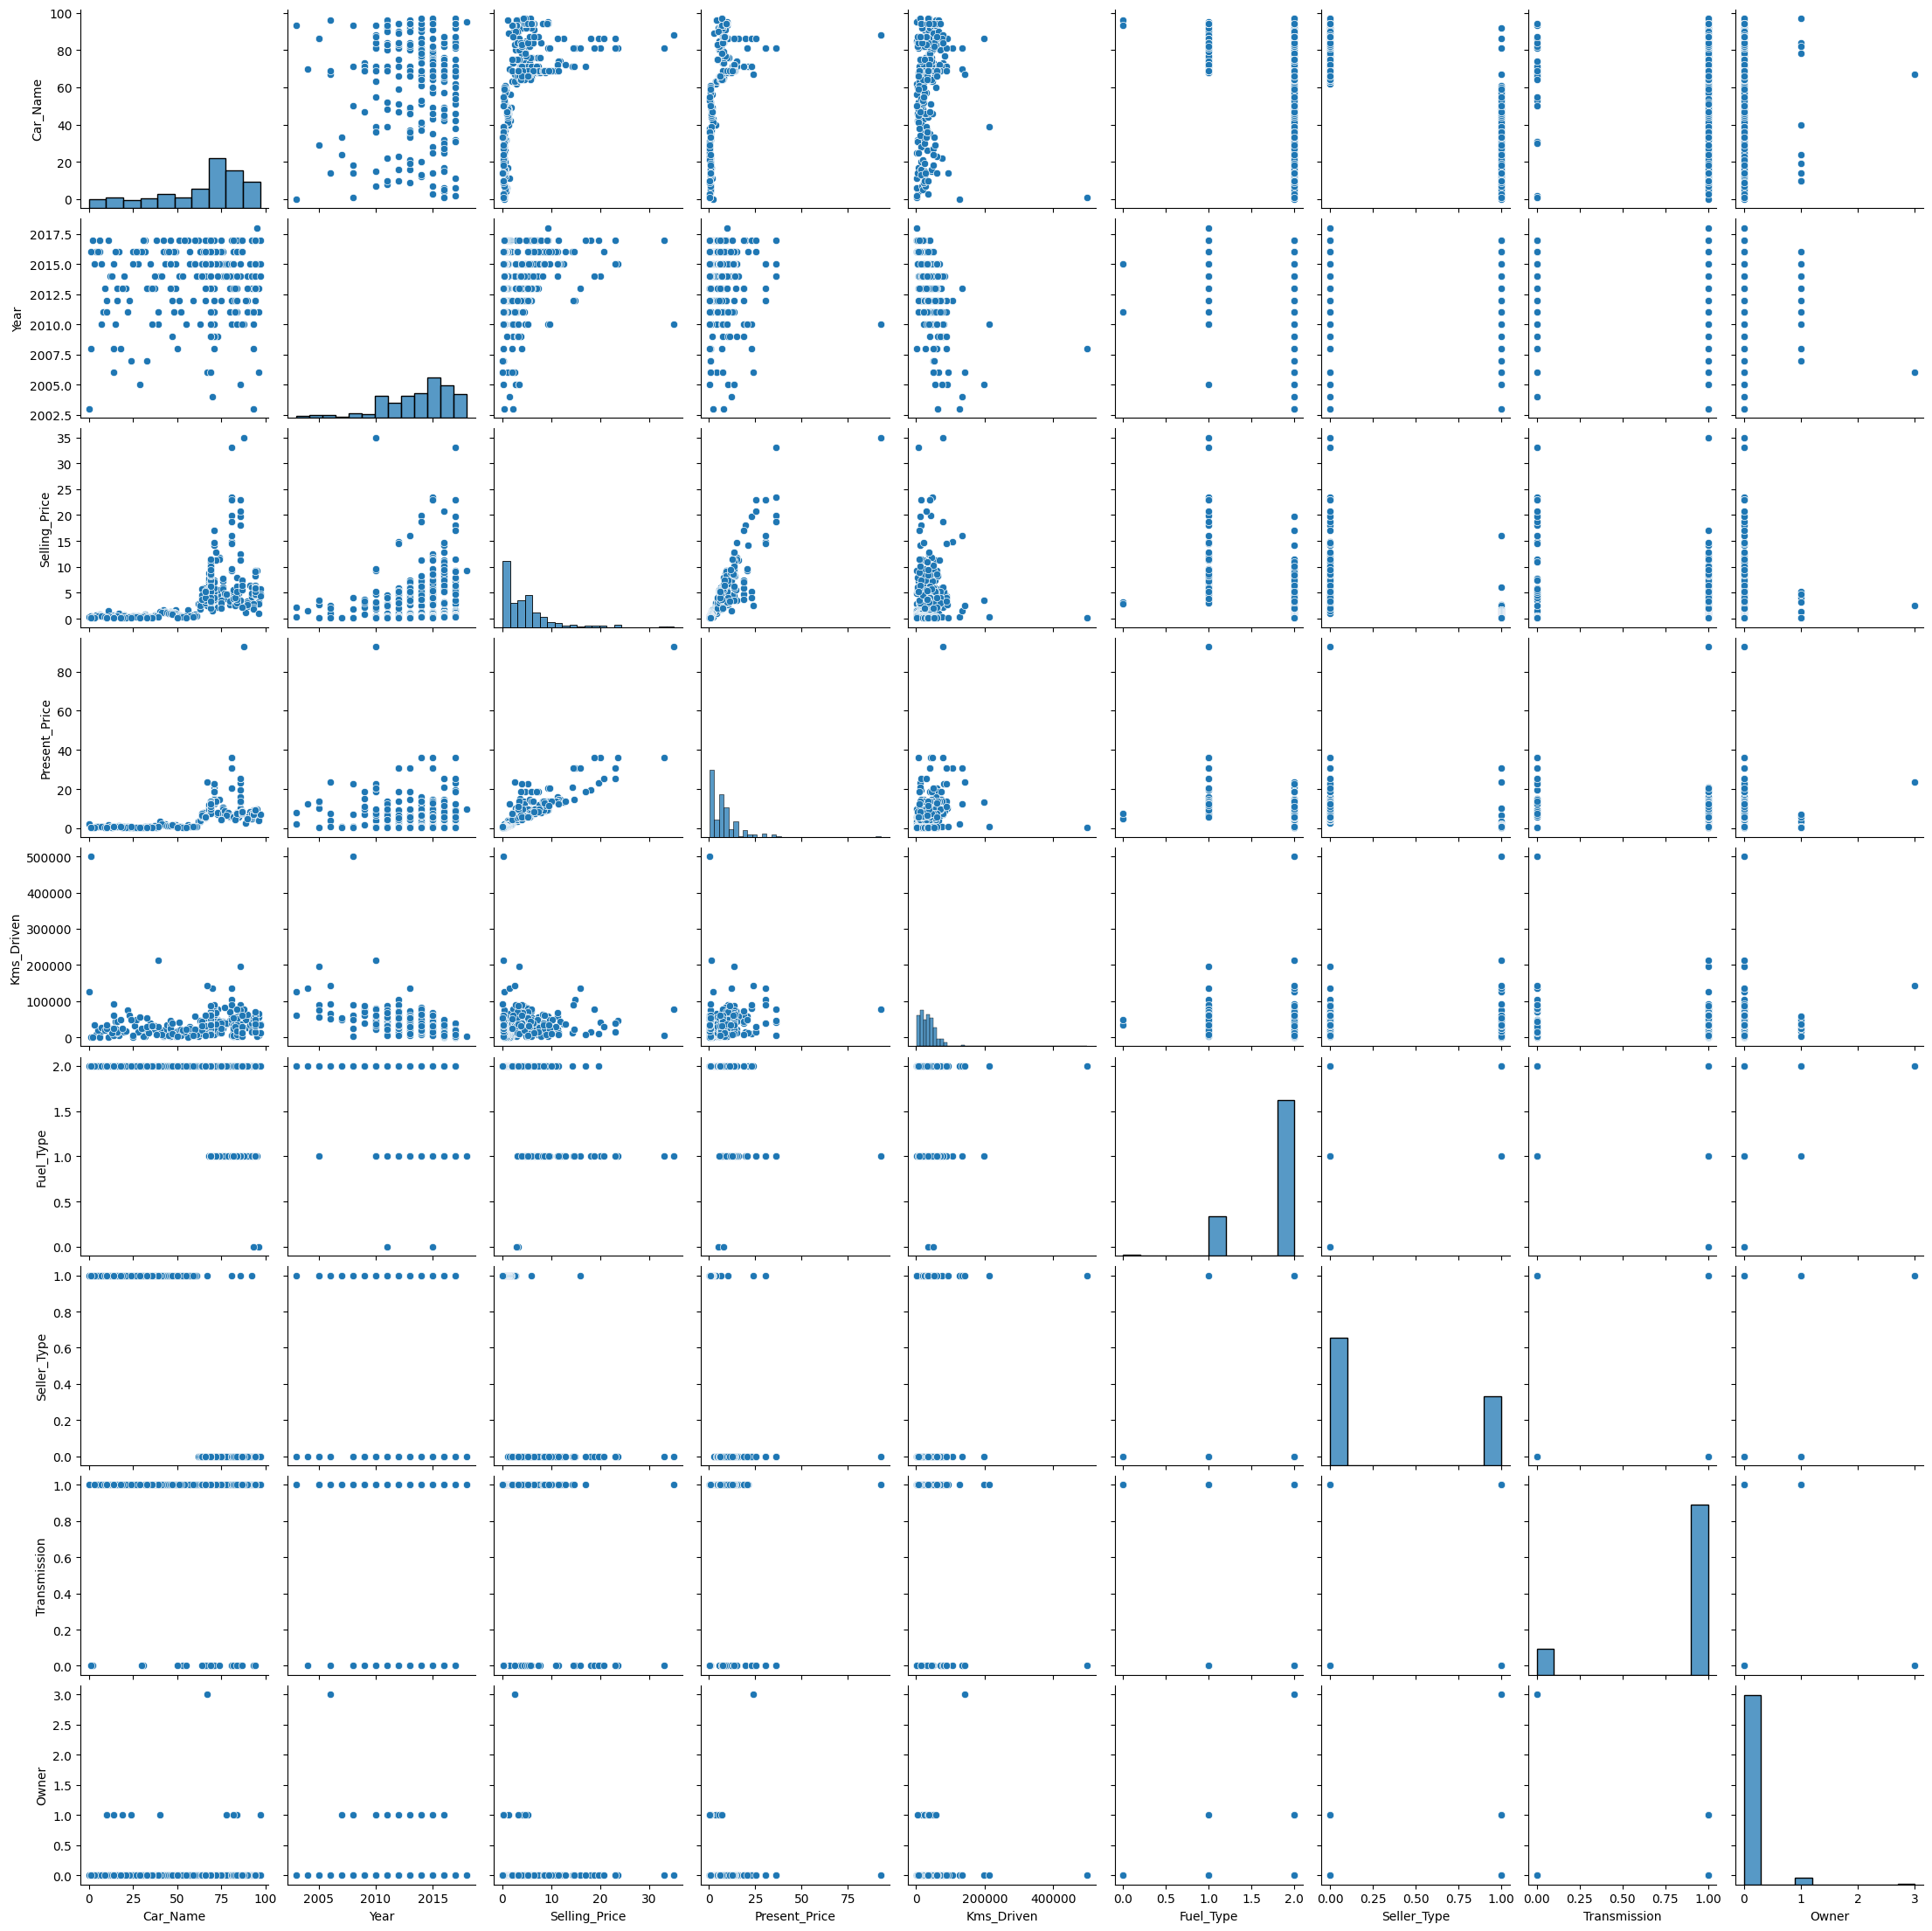

In [54]:
# Create the pairplot
sns.pairplot(df)

In [60]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [65]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
5,9.25
6,6.75
7,6.50
8,8.75
9,7.45


In [66]:
X_train

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
184,14,2008,0.750,26000,2,1,1,1
132,6,2017,0.950,3500,2,1,1,0
194,18,2008,0.787,50000,2,1,1,0
75,78,2015,6.800,36000,2,0,1,0
111,48,2016,1.500,8700,2,1,1,0
...,...,...,...,...,...,...,...,...
188,21,2013,0.570,18000,2,1,1,0
71,71,2011,12.480,45000,1,0,1,0
106,40,2014,3.450,16500,2,1,1,1
270,69,2011,10.000,69341,2,0,1,0


In [67]:
y_train

,Selling_Price
184,0.25
132,0.75
194,0.20
75,3.95
111,1.15
59,19.99
93,23.00
6,6.75
175,0.38
30,3.10


In [69]:

# Instantiate the Linear Regression model
lr = LinearRegression()

In [70]:

# Fit the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [71]:

# Predict the target values for the test set
y_pred = lr.predict(X_test)

In [72]:
# Predict the target values for the test set
y_pred = lr.predict(X_test)

In [73]:

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2}")

Mean Squared Error: 3.534719069697364
R-squared value: 0.8465539666864582


In [74]:

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.8800848570469801


In [75]:

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2}")

R-squared value: 0.8465539666864582


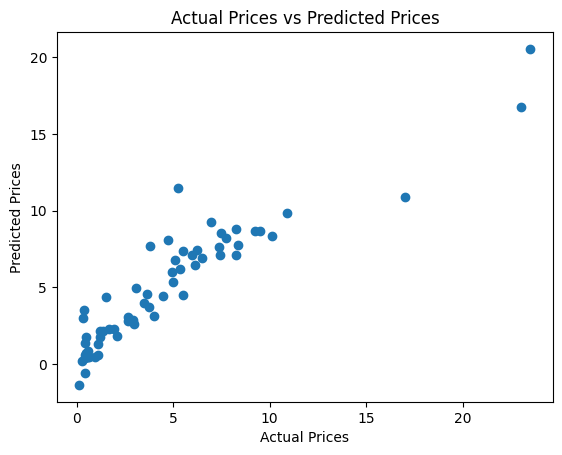

In [76]:

# Plot the true values vs the predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()
